In [1]:
import pandas as pd
import numpy as np

In [2]:
%pip install openpyxl

In [3]:
df=pd.read_excel(r"finalData.xlsx")

In [4]:
df.head()

,AGE,SEX,DURATION OF DM,FAMILY H/O,SMOKING,ALCOHOL,OHA,INSULIN,BMI,WHR,...,S CREATININE,RETINOPATHY,NEPHROPATHY,NEUROPATHY,CAD,CVA,PERIPHERAL ARTERIAL DISEASE,CIMT in mm,RISK,RISK SCORE
0,60,F,7,0,0,0,1,0,29.41,0.85,...,0.8,0,0,0,0,0,0.0,0.776,0,5
1,38,M,3,0,0,0,1,0,24.49,0.94,...,2.0,0,0,0,0,0,0.0,0.680,0,2
2,46,F,2,0,0,0,1,0,22.40,0.96,...,2.2,0,0,0,0,0,0.0,0.640,0,2
3,55,F,9,0,0,0,1,0,18.90,0.94,...,0.9,0,0,0,0,0,0.0,0.640,0,4
4,34,M,2,0,1,0,1,0,23.00,0.91,...,1.2,0,0,0,0,0,1.0,0.820,1,4


In [5]:
df1 = pd.read_excel(
    "finalData.xlsx",
    sheet_name="Sheet1",
    usecols="A:U,AB"
)

In [6]:
df1.head()

,AGE,SEX,DURATION OF DM,FAMILY H/O,SMOKING,ALCOHOL,OHA,INSULIN,BMI,WHR,...,HbA1C,TC,TG,LDL,HDL,VLDL,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm
0,60,F,7,0,0,0,1,0,29.41,0.85,...,7.6,235,260,140,36,36,1,26,0.8,0.776
1,38,M,3,0,0,0,1,0,24.49,0.94,...,6.7,156,144,78,52,32,0,22,2.0,0.680
2,46,F,2,0,0,0,1,0,22.40,0.96,...,7.0,183,121,114,49,39,0,32,2.2,0.640
3,55,F,9,0,0,0,1,0,18.90,0.94,...,7.8,232,178,143,53,30,1,28,0.9,0.640
4,34,M,2,0,1,0,1,0,23.00,0.91,...,6.9,164,103,102,40,35,0,24,1.2,0.820


In [7]:
df1.shape

(100, 22)

In [8]:
df1.columns

Index(['AGE', 'SEX', 'DURATION OF DM', 'FAMILY H/O', 'SMOKING', 'ALCOHOL',
       'OHA', 'INSULIN', 'BMI', 'WHR', 'FBS', 'PPBS', 'HbA1C', 'TC', 'TG',
       'LDL', 'HDL', 'VLDL', 'DYSLIPIDEMIA', 'B UREA', 'S CREATININE',
       'CIMT in mm'],
      dtype='object')

In [9]:
#data cleaning
df1.isnull().sum()

AGE               0
SEX               0
DURATION OF DM    0
FAMILY H/O        0
SMOKING           0
ALCOHOL           0
OHA               0
INSULIN           0
BMI               0
WHR               0
FBS               0
PPBS              0
HbA1C             0
TC                0
TG                0
LDL               0
HDL               0
VLDL              0
DYSLIPIDEMIA      0
B UREA            0
S CREATININE      0
CIMT in mm        0
dtype: int64

In [10]:
df1.isna().sum()

AGE               0
SEX               0
DURATION OF DM    0
FAMILY H/O        0
SMOKING           0
ALCOHOL           0
OHA               0
INSULIN           0
BMI               0
WHR               0
FBS               0
PPBS              0
HbA1C             0
TC                0
TG                0
LDL               0
HDL               0
VLDL              0
DYSLIPIDEMIA      0
B UREA            0
S CREATININE      0
CIMT in mm        0
dtype: int64

In [11]:
sex={'M':1,'F':0}
df1['SEX']=df1['SEX'].map(sex)

In [12]:
df1.head()

,AGE,SEX,DURATION OF DM,FAMILY H/O,SMOKING,ALCOHOL,OHA,INSULIN,BMI,WHR,...,HbA1C,TC,TG,LDL,HDL,VLDL,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm
0,60,0,7,0,0,0,1,0,29.41,0.85,...,7.6,235,260,140,36,36,1,26,0.8,0.776
1,38,1,3,0,0,0,1,0,24.49,0.94,...,6.7,156,144,78,52,32,0,22,2.0,0.680
2,46,0,2,0,0,0,1,0,22.40,0.96,...,7.0,183,121,114,49,39,0,32,2.2,0.640
3,55,0,9,0,0,0,1,0,18.90,0.94,...,7.8,232,178,143,53,30,1,28,0.9,0.640
4,34,1,2,0,1,0,1,0,23.00,0.91,...,6.9,164,103,102,40,35,0,24,1.2,0.820


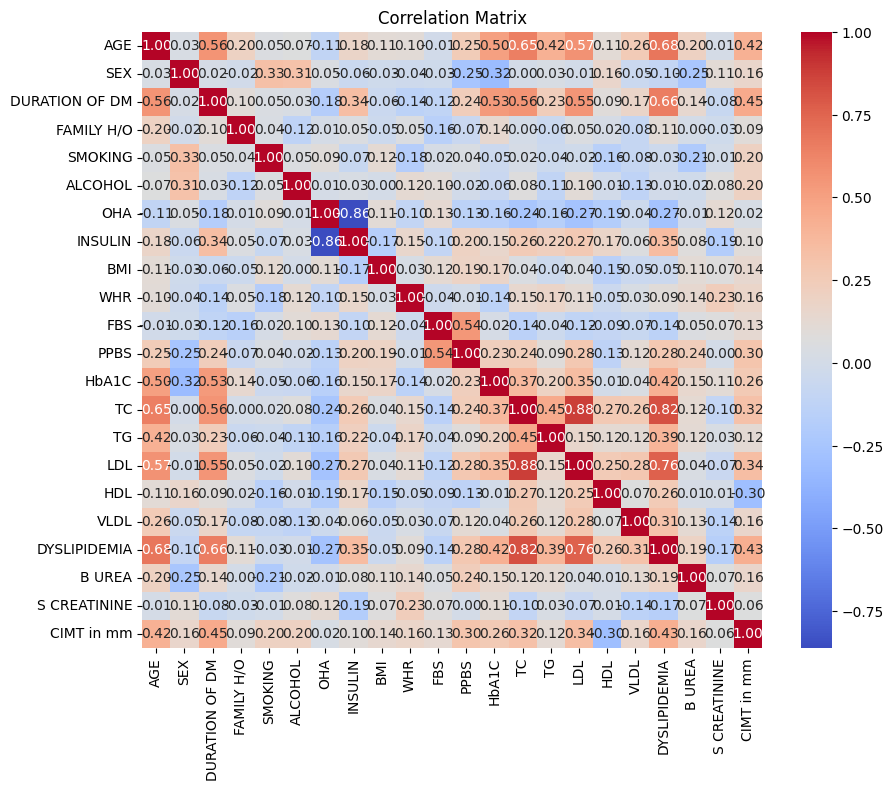

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_pearson = df1.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
#function to find the features which are highly corelated and that used to drop the features
def correlation(dataset,thresold,correlation_pearson):
  col_corr=set()
  for i in range(len(correlation_pearson.columns)):
    for j in range(i):
      if abs(correlation_pearson.iloc[i,j])>thresold:
        colname=correlation_pearson.columns[i]
        col_corr.add(colname)
  return col_corr


In [15]:
corr_features=correlation(df1,0.85,correlation_pearson)
len(set(corr_features))

2

In [16]:
corr_features

{'INSULIN', 'LDL'}

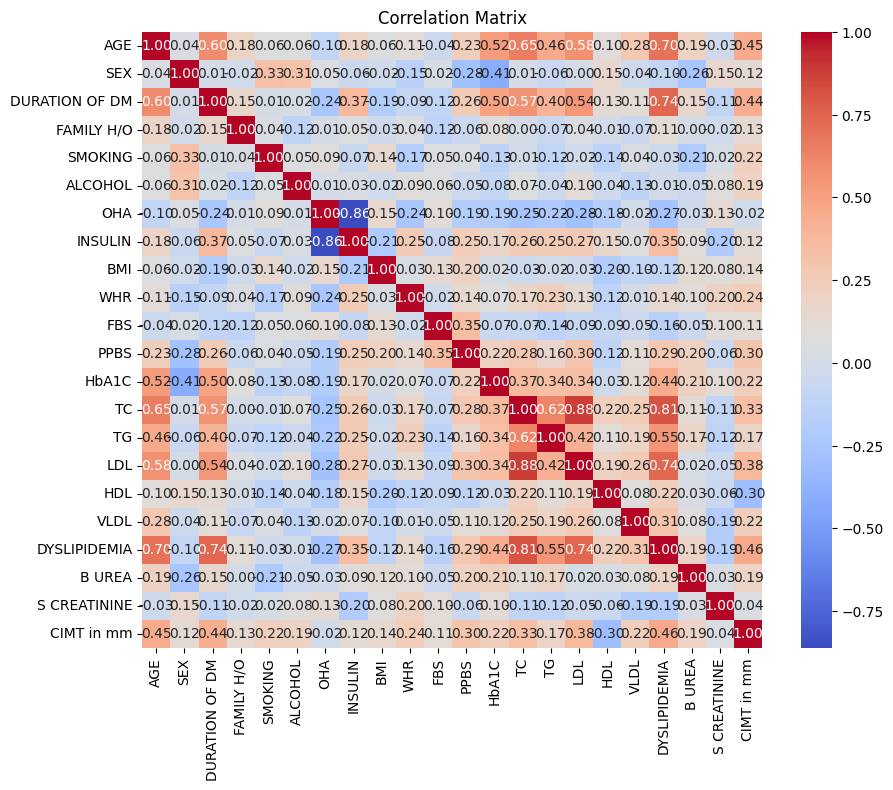

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_spearman = df1.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
#function to find the features which are highly corelated and that used to drop the features in spearman correlation
def correlation(dataset,thresold,correlation_spearman):
  col_corr=set()
  for i in range(len(correlation_spearman.columns)):
    for j in range(i):
      if abs(correlation_spearman.iloc[i,j])>thresold:
        colname=correlation_spearman.columns[i]
        col_corr.add(colname)
  return col_corr

In [19]:
corr_features=correlation(df1,0.85,correlation_spearman)
len(set(corr_features))

2

In [20]:
corr_features

{'INSULIN', 'LDL'}

In [21]:
corelation_drop_columns=['LDL','INSULIN']
df1.drop(corelation_drop_columns,axis=1,inplace=True)

In [22]:
df1.shape

(100, 20)

In [23]:
#creating dataframe for categorical features for chiSquare analysis
column_names=[ 'SEX', 'FAMILY H/O', 'SMOKING', 'ALCOHOL','OHA','DYSLIPIDEMIA']
df_categorical=df[column_names]
df_categorical.head()

,SEX,FAMILY H/O,SMOKING,ALCOHOL,OHA,DYSLIPIDEMIA
0,F,0,0,0,1,1
1,M,0,0,0,1,0
2,F,0,0,0,1,0
3,F,0,0,0,1,1
4,M,0,1,0,1,0


In [24]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency

In [25]:
target_variable = 'RISK'

features = []
chi2_statistics = []
p_values = []


# Loop through each column (feature) in the DataFrame (excluding the target variable)
for column in df_categorical.columns:
    if column != target_variable:
        # Create a contingency table between the current feature and the target variable
        contingency_table = pd.crosstab(df1[column], df[target_variable])

        # Perform the chi-square test
        chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

        # Append the results to the lists
        features.append(column)
        chi2_statistics.append(chi2_stat)
        p_values.append(p_val)

# Create a DataFrame from the lists of results
chi2_results_df = pd.DataFrame({
    'Feature': features,
    'Chi2 Statistic': chi2_statistics,
    'P-value': p_values
})

# Display the DataFrame of chi-square test results
print("Chi-Square Test Results:")
chi2_results_df=chi2_results_df.sort_values(by='Chi2 Statistic',ascending=False)
print(chi2_results_df)

Chi-Square Test Results:
        Feature  Chi2 Statistic   P-value
5  DYSLIPIDEMIA       17.471315  0.000029
2       SMOKING        5.138340  0.023403
4           OHA        1.128283  0.288142
0           SEX        0.903002  0.341978
1    FAMILY H/O        0.021547  0.883298
3       ALCOHOL        0.000000  1.000000


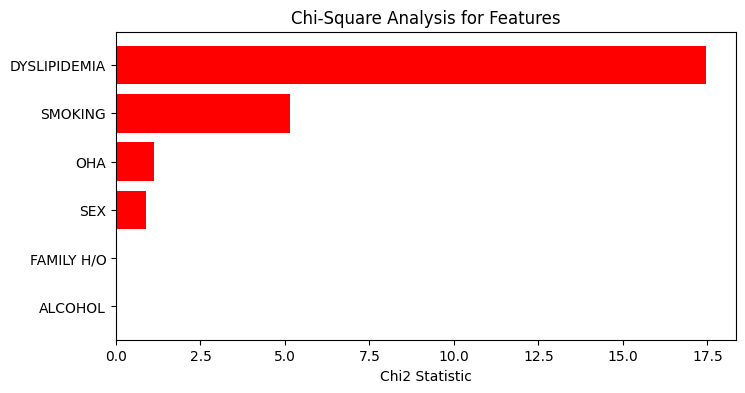

In [26]:
# to draw a graph between feature and their chi2 statistic scores
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.barh(chi2_results_df['Feature'], chi2_results_df['Chi2 Statistic'], color='red')
plt.xlabel('Chi2 Statistic')
plt.title('Chi-Square Analysis for Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

In [27]:
significance_level = 0.05

# Select features with p-values below the significance level
selected_features = chi2_results_df[chi2_results_df['P-value'] < significance_level]['Feature'].tolist()

# Display the selected features
print("Selected Features based on Chi-Square Test:")
print(selected_features)

Selected Features based on Chi-Square Test:
['DYSLIPIDEMIA', 'SMOKING']


In [28]:
chi2_drop_features=['FAMILY H/O','ALCOHOL']
df1.drop(chi2_drop_features,axis=1,inplace=True)

In [29]:
column_names=['AGE','DURATION OF DM','BMI', 'WHR', 'FBS', 'PPBS', 'HbA1C', 'TC', 'TG', 'HDL', 'VLDL', 'B UREA', 'S CREATININE','CIMT in mm']
len(column_names)

14

In [30]:
#creating dataframe for numerical(continuous) features for ANOVA analysis
column_names=['AGE','DURATION OF DM','BMI', 'WHR', 'FBS', 'PPBS', 'HbA1C', 'TC', 'TG', 'HDL', 'VLDL', 'B UREA', 'S CREATININE','CIMT in mm']
df_numerical=df[column_names]
df_numerical.head()

,AGE,DURATION OF DM,BMI,WHR,FBS,PPBS,HbA1C,TC,TG,HDL,VLDL,B UREA,S CREATININE,CIMT in mm
0,60,7,29.41,0.85,97,198,7.6,235,260,36,36,26,0.8,0.776
1,38,3,24.49,0.94,152,218,6.7,156,144,52,32,22,2.0,0.680
2,46,2,22.40,0.96,218,342,7.0,183,121,49,39,32,2.2,0.640
3,55,9,18.90,0.94,135,167,7.8,232,178,53,30,28,0.9,0.640
4,34,2,23.00,0.91,280,348,6.9,164,103,40,35,24,1.2,0.820


In [31]:
import statsmodels.api as sm
from scipy import stats

In [32]:
# performing ANOVA test on numerical input features(14)
target='RISK'
y=df[target]
anova_results = []

for feature in df_numerical.columns:
    # Conduct ANOVA test
    groups = df.groupby(y)[feature].apply(list)
    f_statistic, p_value = stats.f_oneway(*groups)

    # Store ANOVA results
    anova_results.append({'Feature': feature, 'F-Statistic': f_statistic, 'p-value': p_value})

# Convert results to DataFrame for analysis
anova_results_df = pd.DataFrame(anova_results)

# Set significance level (alpha)
alpha = 0.1

# Select significant features based on p-values
significant_features = anova_results_df[anova_results_df['p-value'] < alpha]['Feature'].tolist()

# Display ANOVA results
# Format p-values as numerical strings
anova_results_df['p-value'] = anova_results_df['p-value'].apply(lambda x: '{:.10f}'.format(x))
print("ANOVA Results:")
print(anova_results_df)
# Display significant features
print("\nSignificant Features (p-value < {}):".format(alpha))
significant_features

ANOVA Results:
           Feature  F-Statistic       p-value
0              AGE    31.554408  0.0000001817
1   DURATION OF DM    15.278104  0.0001709002
2              BMI     2.562570  0.1126394479
3              WHR     1.122690  0.2919445516
4              FBS     6.514945  0.0122411101
5             PPBS     8.452048  0.0045096385
6            HbA1C     7.580929  0.0070308165
7               TC    23.691503  0.0000043296
8               TG     7.920509  0.0059078748
9              HDL     0.406884  0.5250429619
10            VLDL     4.460801  0.0372238778
11          B UREA     1.312841  0.2546711444
12    S CREATININE     1.216538  0.2727424023
13      CIMT in mm    14.431507  0.0002522699

Significant Features (p-value < 0.1):


['AGE',
 'DURATION OF DM',
 'FBS',
 'PPBS',
 'HbA1C',
 'TC',
 'TG',
 'VLDL',
 'CIMT in mm']

In [33]:
#sorted anova results dataframe based on scores
anova_results_df=anova_results_df.sort_values(by='F-Statistic',ascending=False)
print(anova_results_df)

           Feature  F-Statistic       p-value
0              AGE    31.554408  0.0000001817
7               TC    23.691503  0.0000043296
1   DURATION OF DM    15.278104  0.0001709002
13      CIMT in mm    14.431507  0.0002522699
5             PPBS     8.452048  0.0045096385
8               TG     7.920509  0.0059078748
6            HbA1C     7.580929  0.0070308165
4              FBS     6.514945  0.0122411101
10            VLDL     4.460801  0.0372238778
2              BMI     2.562570  0.1126394479
11          B UREA     1.312841  0.2546711444
12    S CREATININE     1.216538  0.2727424023
3              WHR     1.122690  0.2919445516
9              HDL     0.406884  0.5250429619


In [34]:
anova_results_df.head()

,Feature,F-Statistic,p-value
0,AGE,31.554408,0.0000001817
7,TC,23.691503,0.0000043296
1,DURATION OF DM,15.278104,0.0001709002
13,CIMT in mm,14.431507,0.0002522699
5,PPBS,8.452048,0.0045096385


In [35]:
significant_features = anova_results_df[anova_results_df['p-value'].astype(float) < 0.05]
print(len(significant_features))
for index, row in significant_features.iterrows():
    print(f"Feature: {row['Feature']}, p-value: {row['p-value']}")

9
Feature: AGE, p-value: 0.0000001817
Feature: TC, p-value: 0.0000043296
Feature: DURATION OF DM, p-value: 0.0001709002
Feature: CIMT in mm, p-value: 0.0002522699
Feature: PPBS, p-value: 0.0045096385
Feature: TG, p-value: 0.0059078748
Feature: HbA1C, p-value: 0.0070308165
Feature: FBS, p-value: 0.0122411101
Feature: VLDL, p-value: 0.0372238778


In [36]:
df1.columns

Index(['AGE', 'SEX', 'DURATION OF DM', 'SMOKING', 'OHA', 'BMI', 'WHR', 'FBS',
       'PPBS', 'HbA1C', 'TC', 'TG', 'HDL', 'VLDL', 'DYSLIPIDEMIA', 'B UREA',
       'S CREATININE', 'CIMT in mm'],
      dtype='object')

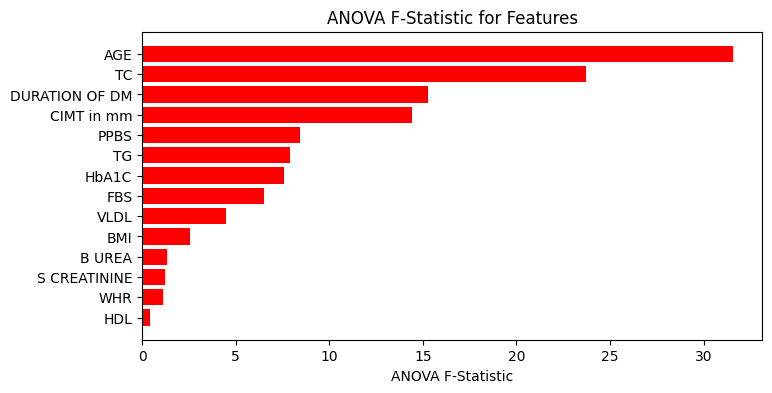

In [37]:
import matplotlib.pyplot as plt
# to draw a graph between feature and their Anova  F-statistic scores
plt.figure(figsize=(8,4))
plt.barh(anova_results_df['Feature'], anova_results_df['F-Statistic'], color='red')
plt.xlabel('ANOVA F-Statistic')
plt.title('ANOVA F-Statistic for Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()

In [38]:
#dropped features from correlation , chi2 ,Anova tests
anova_dropped_features=['VLDL','WHR','HDL']
df1.drop(anova_dropped_features,axis=1,inplace=True)

In [39]:
#merging target variable from df to updated input feature dataframe df1
df1['RISK']=df['RISK']
df1.head()

,AGE,SEX,DURATION OF DM,SMOKING,OHA,BMI,FBS,PPBS,HbA1C,TC,TG,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm,RISK
0,60,0,7,0,1,29.41,97,198,7.6,235,260,1,26,0.8,0.776,0
1,38,1,3,0,1,24.49,152,218,6.7,156,144,0,22,2.0,0.680,0
2,46,0,2,0,1,22.40,218,342,7.0,183,121,0,32,2.2,0.640,0
3,55,0,9,0,1,18.90,135,167,7.8,232,178,1,28,0.9,0.640,0
4,34,1,2,1,1,23.00,280,348,6.9,164,103,0,24,1.2,0.820,1


In [40]:
df1.shape

(100, 16)

**Modelling**

In [41]:
# Separate features (X) and target variable (y)
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.59090909 0.         0.26086957 ... 0.30769231 0.1        0.14666667]
 [0.09090909 1.         0.08695652 ... 0.20512821 0.7        0.06666667]
 [0.27272727 0.         0.04347826 ... 0.46153846 0.8        0.03333333]
 ...
 [0.59090909 1.         0.34782609 ... 0.61538462 0.15       0.75      ]
 [0.27272727 1.         0.17391304 ... 0.71794872 0.4        0.7       ]
 [0.27272727 0.         0.04347826 ... 0.48717949 0.2        0.35      ]]


### **`LR without Folding`**

In [43]:
# Split the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
#Training the model with training model
log.fit(x_train,y_train)

LogisticRegression()

In [45]:
#prediction
y_pred = log.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
error_rate = 1 - accuracy  # Calculate error rate
print(f'Error Rate: {error_rate:.2f}')
# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Error Rate: 0.20
Confusion Matrix:
[[ 6  3]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



### **Decision Tree without cross folding**

In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()#random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
error_rate = 1 - accuracy  # Calculate error rate
print(f'Error Rate: {error_rate:.2f}')

# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Error Rate: 0.20
Confusion Matrix:
[[ 6  3]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



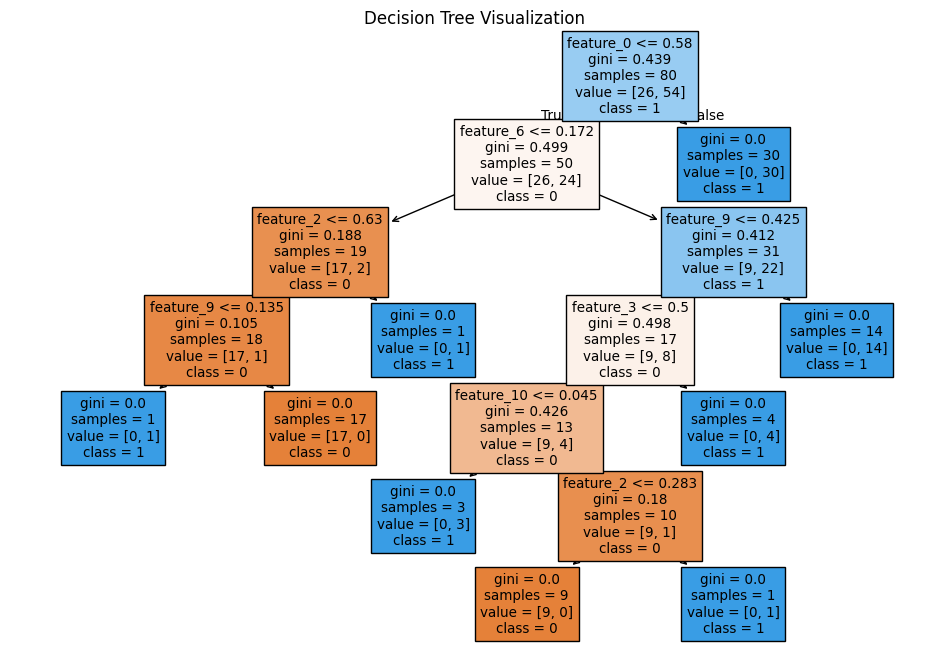

In [48]:
from sklearn.tree import plot_tree
x_df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=x_df.columns, class_names=['0', '1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

### **Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(x_train, y_train)


y_pred = rf_classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
error_rate = 1 - accuracy  # Calculate error rate
print(f'Error Rate: {error_rate:.2f}')
# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Error Rate: 0.20
Confusion Matrix:
[[ 6  3]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



### **Support Vector Machine**

In [50]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.


svm_model.fit(x_train, y_train)


y_pred = svm_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
error_rate = 1 - accuracy  # Calculate error rate
print(f'Error Rate: {error_rate:.2f}')

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Error Rate: 0.20
Confusion Matrix:
[[ 6  3]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [51]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [52]:
from lazypredict.Supervised import LazyClassifier

# Instantiate LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyClassifier
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

# Print the models and their performance
print(models)

100%|██████████| 31/31 [00:06<00:00,  4.88it/s]

[LightGBM] [Info] Number of positive: 54, number of negative: 26
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675000 -> initscore=0.730888
[LightGBM] [Info] Start training from score 0.730888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

### **SGD Classsifier**

In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)  # Using 'log' loss for binary classification

# Train the classifier
sgd_clf.fit(x_train, y_train)

# Make predictions
y_pred = sgd_clf.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[ 5  4]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.73      1.00      0.85        11

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



In [54]:
x1 = df1.iloc[:, :-1]
y1 = df1.iloc[:, -1]

In [55]:
df1.columns

Index(['AGE', 'SEX', 'DURATION OF DM', 'SMOKING', 'OHA', 'BMI', 'FBS', 'PPBS',
       'HbA1C', 'TC', 'TG', 'DYSLIPIDEMIA', 'B UREA', 'S CREATININE',
       'CIMT in mm', 'RISK'],
      dtype='object')

In [56]:
numerical_columns=['AGE','DURATION OF DM','BMI', 'FBS', 'PPBS', 'HbA1C', 'TC', 'TG', 'B UREA', 'S CREATININE','CIMT in mm']
categorical_columns=[ 'SEX', 'SMOKING','OHA','DYSLIPIDEMIA','RISK']

In [57]:
df1

,AGE,SEX,DURATION OF DM,SMOKING,OHA,BMI,FBS,PPBS,HbA1C,TC,TG,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm,RISK
0,60,0,7,0,1,29.41,97,198,7.60,235,260,1,26,0.80,0.78,0
1,38,1,3,0,1,24.49,152,218,6.70,156,144,0,22,2.00,0.68,0
2,46,0,2,0,1,22.40,218,342,7.00,183,121,0,32,2.20,0.64,0
3,55,0,9,0,1,18.90,135,167,7.80,232,178,1,28,0.90,0.64,0
4,34,1,2,1,1,23.00,280,348,6.90,164,103,0,24,1.20,0.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,0,14,1,0,21.40,143,425,10.20,208,130,1,16,1.00,1.40,1
96,59,1,8,1,0,28.00,159,332,6.50,271,235,1,40,1.40,1.20,1
97,60,1,9,0,1,23.00,136,271,6.60,250,115,1,38,0.90,1.50,1
98,46,1,5,0,1,24.00,166,179,6.70,157,149,0,42,1.40,1.44,0


In [58]:
import pandas as pd
import numpy as np

# Assuming your dataset is stored in a DataFrame named 'df1'
# Your original dataset
original_df = df1.copy()

# Function to add noise to numeric columns
def add_noise(value, noise_level=0.05):
    # For binary columns, return either 0 or 1
    if value == 0 or value == 1:
        return value
    # For numeric columns, add random noise
    return value * (1 + np.random.uniform(-noise_level, noise_level))

# Augment the dataset by duplicating rows with random noise
augmented_df = original_df.copy()

# Define the number of times to duplicate each row
augmentation_factor = 11

# Loop through each row in the original dataset and duplicate it with noise
for _ in range(augmentation_factor):
    augmented_df = pd.concat([augmented_df, original_df.applymap(add_noise)], ignore_index=True)

# Display the augmented dataset
augmented_df


,AGE,SEX,DURATION OF DM,SMOKING,OHA,BMI,FBS,PPBS,HbA1C,TC,TG,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm,RISK
0,60.00,0,7.00,0,1,29.41,97.00,198.00,7.60,235.00,260.00,1,26.00,0.80,0.78,0
1,38.00,1,3.00,0,1,24.49,152.00,218.00,6.70,156.00,144.00,0,22.00,2.00,0.68,0
2,46.00,0,2.00,0,1,22.40,218.00,342.00,7.00,183.00,121.00,0,32.00,2.20,0.64,0
3,55.00,0,9.00,0,1,18.90,135.00,167.00,7.80,232.00,178.00,1,28.00,0.90,0.64,0
4,34.00,1,2.00,1,1,23.00,280.00,348.00,6.90,164.00,103.00,0,24.00,1.20,0.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,52.56,0,13.40,1,0,21.29,146.18,416.78,9.93,218.07,125.26,1,16.04,1.00,1.34,1
1196,56.17,1,8.20,1,0,28.76,162.21,315.42,6.29,270.46,238.38,1,39.46,1.44,1.18,1
1197,57.84,1,8.71,0,1,22.96,140.79,269.78,6.61,255.18,114.05,1,38.66,0.93,1.43,1
1198,45.26,1,4.80,0,1,23.75,162.53,186.31,6.40,157.56,149.79,0,42.76,1.42,1.44,0


In [59]:
augmented_df

,AGE,SEX,DURATION OF DM,SMOKING,OHA,BMI,FBS,PPBS,HbA1C,TC,TG,DYSLIPIDEMIA,B UREA,S CREATININE,CIMT in mm,RISK
0,60.00,0,7.00,0,1,29.41,97.00,198.00,7.60,235.00,260.00,1,26.00,0.80,0.78,0
1,38.00,1,3.00,0,1,24.49,152.00,218.00,6.70,156.00,144.00,0,22.00,2.00,0.68,0
2,46.00,0,2.00,0,1,22.40,218.00,342.00,7.00,183.00,121.00,0,32.00,2.20,0.64,0
3,55.00,0,9.00,0,1,18.90,135.00,167.00,7.80,232.00,178.00,1,28.00,0.90,0.64,0
4,34.00,1,2.00,1,1,23.00,280.00,348.00,6.90,164.00,103.00,0,24.00,1.20,0.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,52.56,0,13.40,1,0,21.29,146.18,416.78,9.93,218.07,125.26,1,16.04,1.00,1.34,1
1196,56.17,1,8.20,1,0,28.76,162.21,315.42,6.29,270.46,238.38,1,39.46,1.44,1.18,1
1197,57.84,1,8.71,0,1,22.96,140.79,269.78,6.61,255.18,114.05,1,38.66,0.93,1.43,1
1198,45.26,1,4.80,0,1,23.75,162.53,186.31,6.40,157.56,149.79,0,42.76,1.42,1.44,0


In [60]:
augmented_df.to_csv('augmented file1.csv',index=False)

In [61]:
augmented_df=pd.read_csv('augmented file1.csv')

In [62]:
x = augmented_df.iloc[:, :-1]
y = augmented_df.iloc[:, -1]

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.56514357 0.         0.24891987 ... 0.30143674 0.10732107 0.1542415 ]
 [0.11491816 1.         0.08297329 ... 0.20646412 0.67138654 0.0784145 ]
 [0.27863649 0.         0.04148665 ... 0.44389568 0.76539745 0.04681992]
 ...
 [0.52084505 1.         0.31973744 ... 0.60199081 0.167085   0.67348431]
 [0.2634918  1.         0.15780014 ... 0.69933167 0.39761013 0.68111696]
 [0.25573047 0.         0.04528332 ... 0.44833878 0.20133198 0.37882991]]


In [64]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
#Training the model with training model
log.fit(x_train,y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = log.predict(x_test)
accuracyLR = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyLR:.2f}')
error_rateLR = 1 - accuracyLR  # Calculate error rate
print(f'Error Rate: {error_rateLR:.2f}')
# Display the confusion matrix
conf_matLR = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matLR)

class_reportLR = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_reportLR)

Accuracy: 0.84
Error Rate: 0.16
Confusion Matrix:
[[132  43]
 [ 32 273]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       175
           1       0.86      0.90      0.88       305

    accuracy                           0.84       480
   macro avg       0.83      0.82      0.83       480
weighted avg       0.84      0.84      0.84       480



decision tree classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()#random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracyDT = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyDT:.2f}')
error_rateDT = 1 - accuracyDT  # Calculate error rate
print(f'Error Rate: {error_rateDT:.2f}')

# Display the confusion matrix
conf_matDT = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matDT)

# Display the classification report
class_reportDT = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_reportDT)

Accuracy: 0.97
Error Rate: 0.03
Confusion Matrix:
[[170   5]
 [  7 298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       175
           1       0.98      0.98      0.98       305

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.98      0.97      0.98       480



support vector machine

In [68]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.


svm_model.fit(x_train, y_train)


y_pred = svm_model.predict(x_test)


accuracySVM = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracySVM:.2f}')
error_rateSVM = 1 - accuracySVM  # Calculate error rate
print(f'Error Rate: {error_rateSVM:.2f}')

conf_matSVM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matSVM)

# Display the classification report
class_reportSVM = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_reportSVM)

Accuracy: 0.86
Error Rate: 0.14
Confusion Matrix:
[[143  32]
 [ 36 269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.89      0.88      0.89       305

    accuracy                           0.86       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.86      0.86      0.86       480



Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(x_train, y_train)


y_pred = rf_classifier.predict(x_test)


accuracyRF = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyRF:.2f}')
error_rateRF = 1 - accuracyRF  # Calculate error rate
print(f'Error Rate: {error_rateRF:.2f}')
# Display the confusion matrix
conf_matRF = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matRF)

# Display the classification report
print("Training predictions")
#class_report = classification_report(y_train, y_pred)
print("Test predictions")
class_reportRF = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_reportRF)

Accuracy: 1.00
Error Rate: 0.00
Confusion Matrix:
[[175   0]
 [  0 305]]
Training predictions
Test predictions
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       305

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [70]:
# Plotting Accuracy

accuracyRF = 0.99
accuracyANN = 1.00
error_rateANN = 0.00

accuracy_score = {
    'model' : ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "Proposed Model"],
    'scores' : [accuracyLR, accuracySVM, accuracyDT, accuracyRF, accuracyANN],
    'error_rate': [error_rateLR, error_rateSVM, error_rateDT, error_rateRF, error_rateANN]
}

accuracy_df = pd.DataFrame(accuracy_score)
accuracy_df

,model,scores,error_rate
0,Logistic Regression,0.84,0.16
1,Support Vector Machine,0.86,0.14
2,Decision Tree,0.97,0.03
3,Random Forest,0.99,0.00
4,Proposed Model,1.00,0.00


In [71]:
accuracy_df['model'][4:]

4    Proposed Model
Name: model, dtype: object

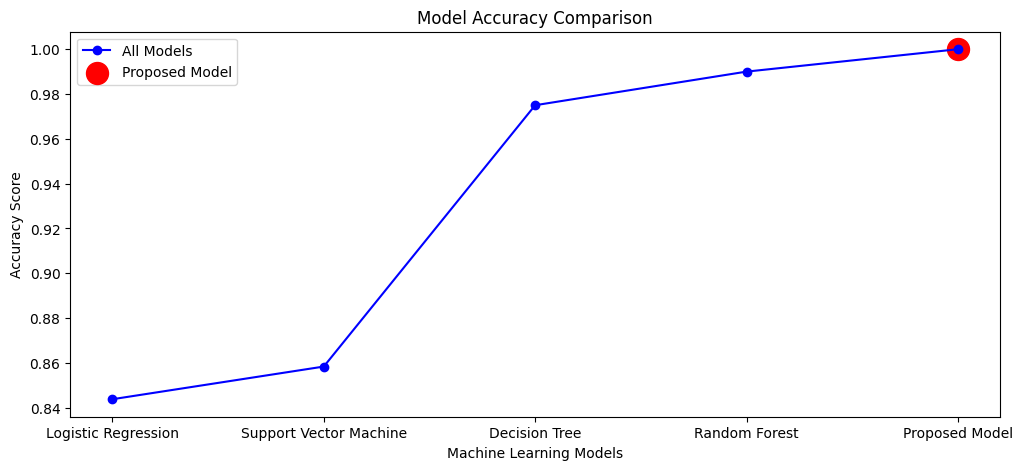

In [72]:
plt.figure(figsize=(12, 5))
plt.plot(accuracy_df['model'], accuracy_df['scores'], marker='o', linestyle='-', color='blue', label='All Models')

# Highlight ANN by changing its color
plt.scatter(accuracy_df['model'].iloc[-1], accuracy_df['scores'].iloc[-1], color='red', label='Proposed Model', s=250, edgecolors='red')

# Labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()

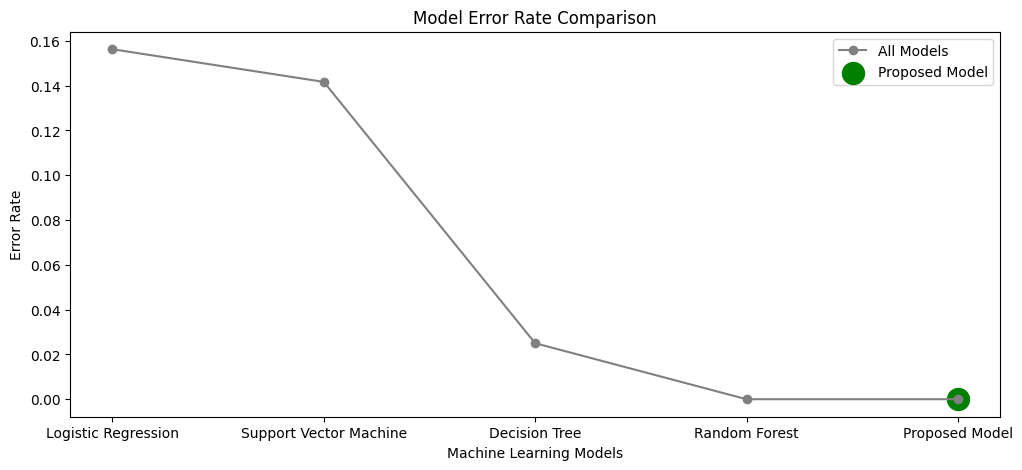

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(accuracy_df['model'], accuracy_df['error_rate'], marker='o', linestyle='-', color='gray', label='All Models')

# Highlight ANN by changing its color
plt.scatter(accuracy_df['model'].iloc[-1], accuracy_df['error_rate'].iloc[-1], color='green', label='Proposed Model', s=250, edgecolors='green')

# Labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Error Rate")
plt.title("Model Error Rate Comparison")
plt.legend()
plt.show()